# Introducion of Decision Tree :

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.
One way to think of a Machine Learning classification algorithm is that it is built to make decisions.

Decision trees can perform both classification and regression tasks, so you’ll see authors refer to them as CART algorithm: Classification and Regression Tree.


# Problem Statement :
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) &
all other variable will be independent in the analysis.  


# About the Data:

As you seen in the problem statement, this is an manufacturing firm sales data.The data is havaing 400 rows & 11 colummns.
The taget variable sale is dependent with other variables like income, advt, compprice etc. We will have to the neccesary steps like EDA, Feature engineering, data before implementing the decision tree classifier.



In [1140]:
# Import Liabraries
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [1141]:
comp=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/ExcelrThane/DS/Assignments/Dec_Tree/Company_Data.csv')

In [1142]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA


In [1143]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [1144]:
comp.shape

(400, 11)

In [1145]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [1146]:
comp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [1147]:
comp.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [1148]:
comp['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

<AxesSubplot:ylabel='Frequency'>

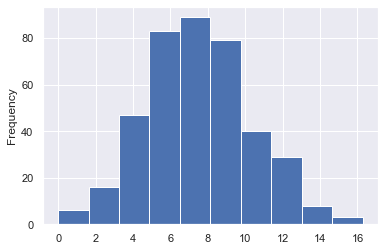

In [1149]:
comp['Sales'].plot(kind='hist')

In [1150]:
comp[comp.duplicated()].shape

(0, 11)

# Correlation

In [1151]:
corr=comp.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


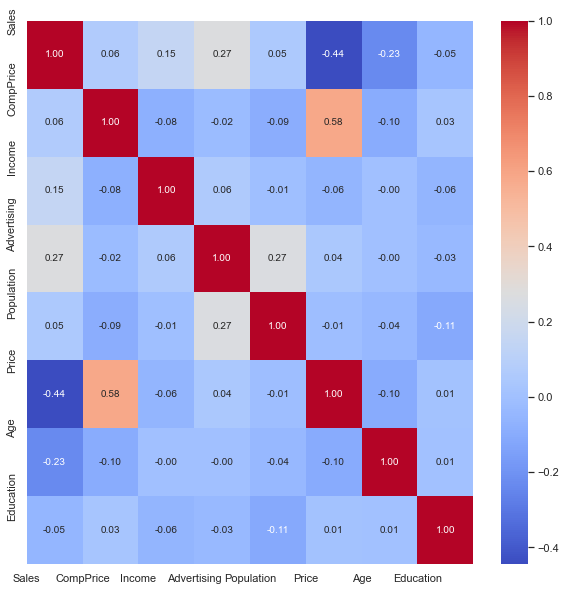

In [1152]:
# visualize Correlations
corr=comp.corr()
fig,ax=plt.subplots(figsize=(10,10))

sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)),corr.columns);
plt.yticks(range(len(corr.columns)),corr.columns)

plt.show()                           # Collinarity can seen in between 'Company Price' & 'Price' Variables.

<AxesSubplot:xlabel='Sales', ylabel='Price'>

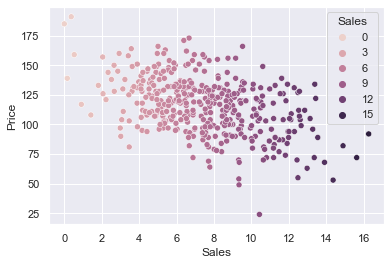

In [1156]:
sns.scatterplot(comp['Sales'],comp['Price'],hue=comp['Sales'])

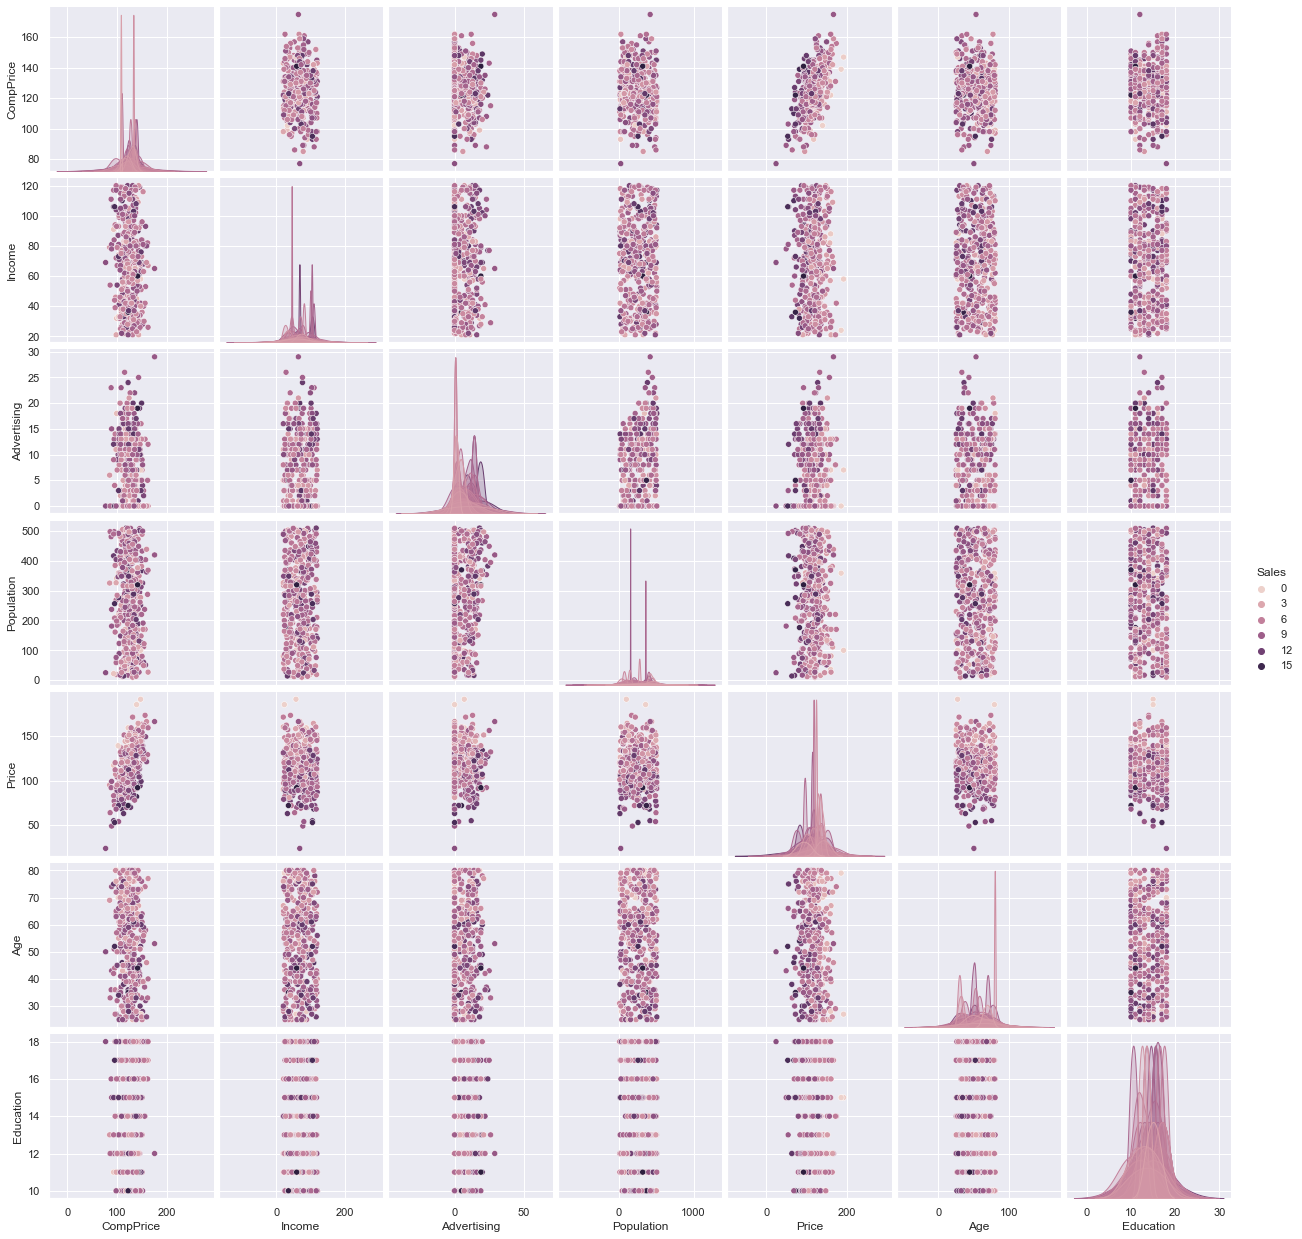

In [1090]:
sns.pairplot(data=comp,hue='Sales')

# Feature engineering

Converting Target(Sales) columns into categorical variable.

In [1157]:
len(comp.Sales.unique())

336

In [1093]:
comp.Sales.values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [1158]:
comp['Sales']=pd.cut(np.array([9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=['Min','Avg','Max'])

# Lableing the Sales variable in to Min,avg & Max Category.

In [1095]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Avg,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Max,111,48,16,260,83,Good,65,10,Yes,Yes
2,Avg,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Avg,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Min,141,64,3,340,128,Bad,38,13,Yes,No


# Visualization of features & Target 

In [1097]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
encoder1=LabelEncoder()
comp['ShelveLoc'] =encoder1.fit_transform(comp['ShelveLoc'])
comp['Urban'] =encoder1.fit_transform(comp['Urban'])
comp['US'] =encoder1.fit_transform(comp['US'])

(array([247.,   0.,   0.,   0.,   0.,  51.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

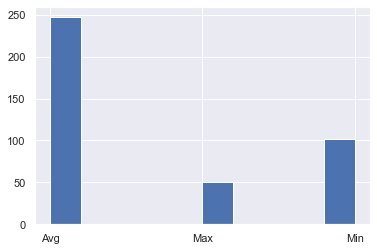

In [1098]:
plt.hist(comp['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='count'>

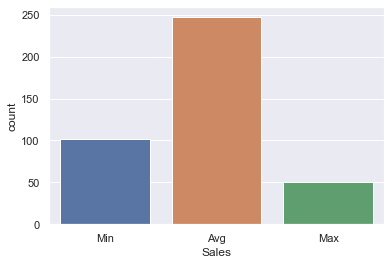

In [1099]:
sns.countplot(comp['Sales']) # Average Sales category is high in numbers.

<AxesSubplot:xlabel='CompPrice', ylabel='count'>

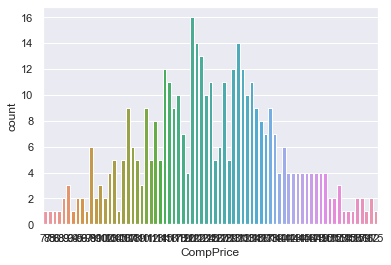

In [1100]:
sns.countplot(comp['CompPrice'])

(array([  1.,   4.,  14.,  36.,  91., 106.,  95.,  37.,  14.,   2.]),
 array([ 24. ,  40.7,  57.4,  74.1,  90.8, 107.5, 124.2, 140.9, 157.6,
        174.3, 191. ]),
 <BarContainer object of 10 artists>)

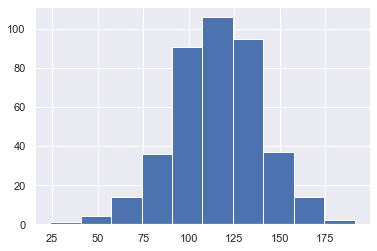

In [1101]:
plt.hist(comp['Price'])

<AxesSubplot:xlabel='Price', ylabel='count'>

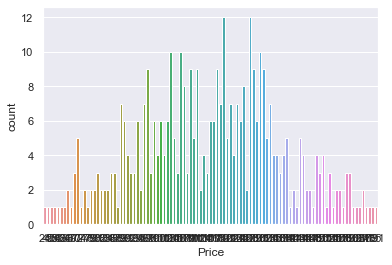

In [1102]:
sns.countplot(comp['Price'])

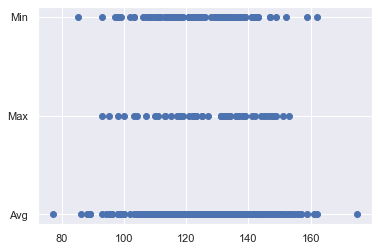

In [1159]:
plt.scatter(x='CompPrice',y='Sales',data=comp)

<Figure size 1440x1440 with 0 Axes>

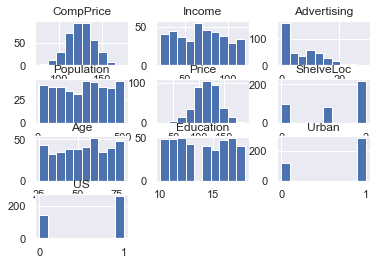

<Figure size 1440x1440 with 0 Axes>

In [1104]:
comp.hist()
plt.figure(figsize=(20,20))

<Figure size 5760x5760 with 0 Axes>

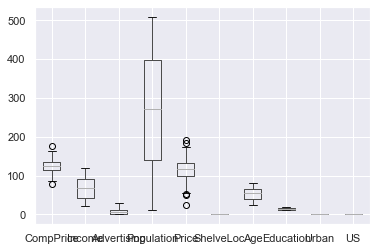

<Figure size 5760x5760 with 0 Axes>

In [1105]:
comp.boxplot()
plt.figure(figsize=(80,80))

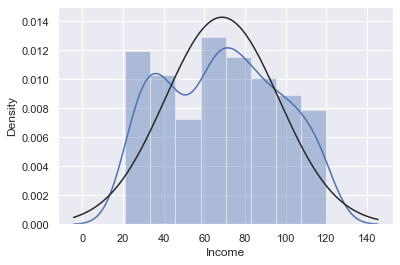

In [1106]:
from scipy.stats import norm
import seaborn as sns
from sklearn.metrics  import accuracy_score,classification_report
sns.set_theme()
dis= sns.distplot(comp['Income'], fit=norm,kde=True)

# Making Feature & Target Variable into X & y

In [1108]:
x=comp.iloc[:,1:] # All features
y=comp['Sales'] # Target variable

In [1109]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [1110]:
y

0      Avg
1      Max
2      Avg
3      Avg
4      Min
      ... 
395    Max
396    Avg
397    Avg
398    Avg
399    Avg
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Min' < 'Avg' < 'Max']

In [1111]:
y.value_counts()


Avg    247
Min    102
Max     51
Name: Sales, dtype: int64

# Splitting x & y into training and test dataset

In [1112]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Building Decision Tree Classifier using Entropy    Criteria

In [1113]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Plot the Decision tree

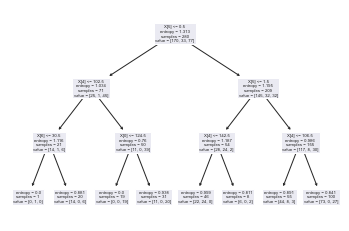

In [1114]:

tree.plot_tree(model);


In [1135]:
fn=['Sales','ComPrice','Income','Adverting','Population','Price']
cn=['Min','Avg','Max']

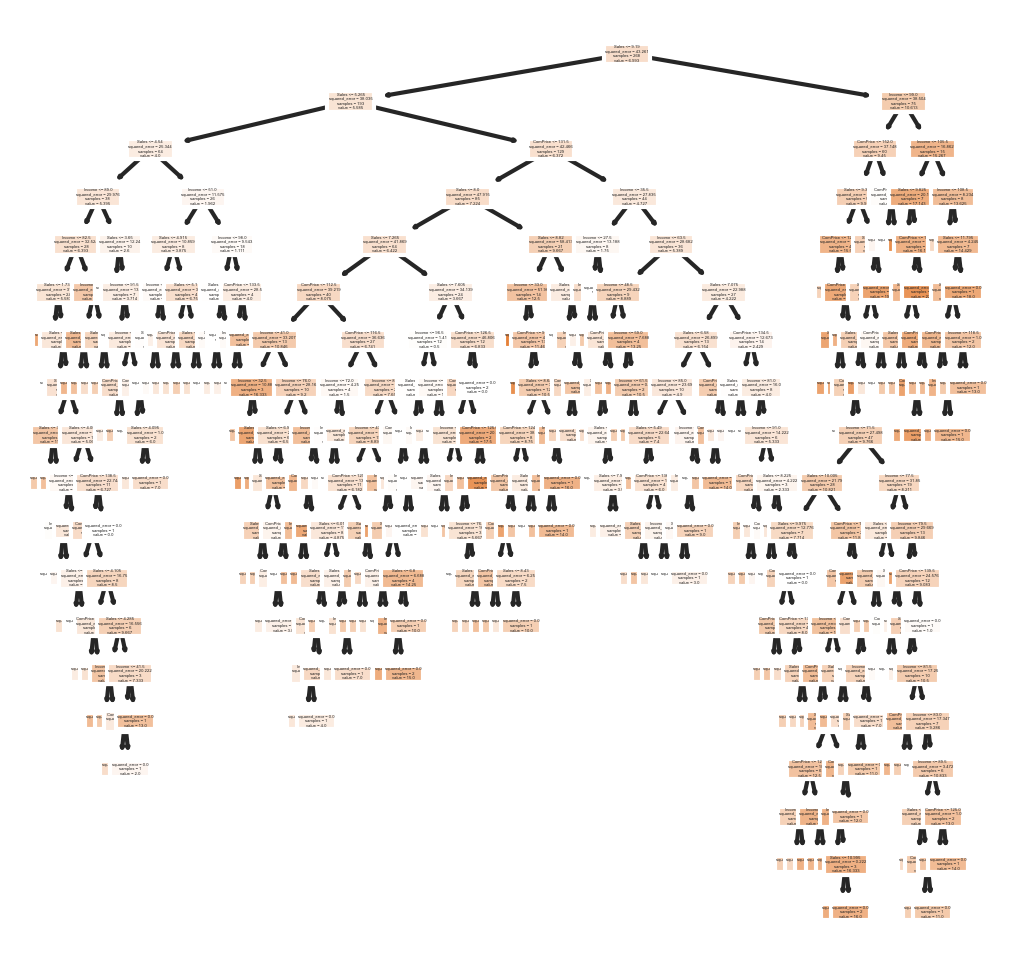

In [1137]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Predictions

In [1116]:

preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Avg    77
Max    29
Min    14
dtype: int64

In [1117]:
preds

array(['Max', 'Avg', 'Avg', 'Min', 'Avg', 'Min', 'Avg', 'Avg', 'Min',
       'Avg', 'Avg', 'Avg', 'Min', 'Max', 'Avg', 'Avg', 'Max', 'Avg',
       'Avg', 'Avg', 'Avg', 'Avg', 'Max', 'Max', 'Avg', 'Avg', 'Avg',
       'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg',
       'Avg', 'Avg', 'Avg', 'Max', 'Avg', 'Max', 'Avg', 'Max', 'Min',
       'Avg', 'Avg', 'Avg', 'Max', 'Avg', 'Min', 'Max', 'Max', 'Avg',
       'Min', 'Max', 'Min', 'Max', 'Max', 'Min', 'Avg', 'Max', 'Min',
       'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Max', 'Avg',
       'Max', 'Avg', 'Avg', 'Max', 'Max', 'Max', 'Avg', 'Max', 'Min',
       'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Max', 'Avg',
       'Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Min', 'Avg', 'Avg', 'Avg',
       'Max', 'Avg', 'Avg', 'Min', 'Max', 'Avg', 'Avg', 'Max', 'Avg',
       'Avg', 'Avg', 'Max', 'Avg', 'Max', 'Max', 'Avg', 'Avg', 'Avg',
       'Avg', 'Max', 'Min'], dtype=object)

In [1118]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Avg,Max,Min
Sales,,,
Min,17,0,8
Avg,55,16,6
Max,5,13,0


Accuracy Check

In [1119]:

np.mean(preds==y_test)

0.6333333333333333

In [1120]:
preds==y_test

132    False
309    False
341     True
196     True
246     True
       ...  
216     True
259    False
49      True
238    False
343    False
Name: Sales, Length: 120, dtype: bool

# Building Decision Tree Classifier (CART) using    Gini Criteria

In [1121]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [1122]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [1123]:
#Prediction and computing the accuracy on testdata
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6333333333333333

In [1124]:
accuracy =accuracy_score(y_test,pred)
print(accuracy)

0.6333333333333333


Decision Tree Regression Example

In [1125]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [1126]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [1127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [1128]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [1129]:
#Find the accuracy
model.score(X_test,y_test)

-1.2182218282954862

# Compare with Logistic regression classifier

In [1130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [1131]:
model_Log=LogisticRegression(random_state=0)

In [1132]:
model_Log.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [1133]:
y_pred_log=model_Log.predict(X_test)

In [1134]:
print('Accuracy of Logistic Regression classifier:',accuracy_score(y_test,y_pred_log))

Accuracy of Logistic Regression classifier: 0.3560606060606061


# Conclusion: 

The accuracy score of Decion Tree Classifier is 0.63, where as the Accuracy score of Logistic Regression Classifier is 0.35.

To improve the accuracy of the model can try with other classifier algo i.e KNN but we cannot neglect the overfitting problem while fitting it to the model.

In the end, can use Decion tree classifier for better result on predicting this dataset.